Dimensionality reduction techniques from sklearn to analyse embedding outputs from protein language models

In [1]:
#@title Mount drive and load libraries { display-mode: "form" }
%%capture
from sklearn.manifold import Isomap, TSNE
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd
import os
from google.colab import drive
import numpy as np

!pip install umap-learn[plot]
import umap

drive.mount('/content/drive/')
path = '/content/drive/MyDrive/msc-project-mbalmf01'
os.chdir(path)

os.listdir()

In [2]:
df = pd.read_csv('all_paired/230805_ankh_tensor_10000.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,seq
0,-0.024482,0.007228,-0.001585,0.000707,0.008215,0.004985,0.003505,0.001370,-0.006802,0.001784,...,-0.012195,0.002781,-0.005075,-0.001047,0.009039,0.000002,-0.009873,-0.002028,-0.007518,AACGTTGTCTCGCATC-1_contig_2_AACGTTGTCTCGCATC-1...
1,-0.025085,0.008314,-0.001044,0.001571,0.006498,0.006720,0.003649,0.002229,-0.007137,0.002653,...,-0.011894,0.002423,-0.006037,-0.002191,0.009906,-0.001431,-0.008674,-0.001290,-0.006119,AACTCCCCAGTTTACG-1_contig_1_AACTCCCCAGTTTACG-1...
2,-0.024743,0.004909,-0.003940,0.002075,0.012859,0.005442,0.005055,0.004185,-0.007867,0.003407,...,-0.010496,0.000440,-0.006551,-0.003698,0.005067,-0.003032,-0.009678,-0.001725,-0.005766,AACTTTCCAATCTACG-1_contig_2_AACTTTCCAATCTACG-1...
3,-0.022117,0.007103,-0.002866,0.001766,0.009317,0.004625,0.003328,0.000341,-0.005280,0.001050,...,-0.011916,0.001629,-0.006447,-0.003057,0.008038,-0.003565,-0.005637,-0.000655,-0.007553,AAGGTTCGTCAGAGGT-1_contig_2_AAGGTTCGTCAGAGGT-1...
4,-0.024954,0.009146,-0.003355,-0.001528,0.001854,0.007528,0.002048,0.001132,-0.011293,0.001699,...,-0.012107,0.004293,-0.006576,-0.001942,0.007095,0.000418,-0.008124,-0.002870,-0.005733,ACACCAACACAACTGT-1_contig_2_ACACCAACACAACTGT-1...


In [3]:
# @title Redux Fit function for testing different models for dimension reduction
import inspect

def redux_fit(model, components: int, randstate: int, data: pd, **kwargs) -> pd:
  np.random.seed(randstate)
  model_args = inspect.signature(model).parameters
  if 'method' in model_args:
    method = kwargs.pop('method', None)
    if method:
        redux = model(n_components=components, method=method).fit_transform(data)
    else:
        redux = model(n_components=components).fit_transform(data)
  else:
      redux = model(n_components=components).fit_transform(data)
  X=redux[:, 0]
  y=redux[:, 1]
  new_df = pd.DataFrame([X, y]).transpose()
  new_df.rename(columns={0:'X', 1:'y'}, inplace=True)
  return new_df

In [4]:
test = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230722_cluster_tensor_scfv_10000.csv', index_col=0)
test = test[['seq', 'cluster']]

df = df.merge(how='left', right=test, on='seq')

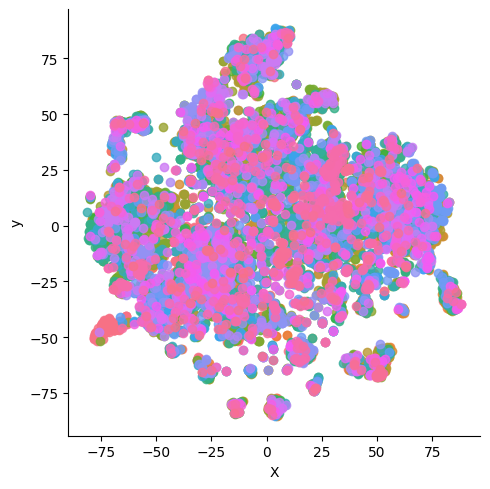

In [7]:
new_df = redux_fit(model=TSNE, components=2, randstate=42, data=df.iloc[:,:-2])
new_df['cluster'] = df['cluster']

sns.lmplot(x='X', y='y', data=new_df,  hue='cluster', fit_reg=False, legend=False)
scatter_kws = {'s': 10}  # Adjust the 's' value to control point size

plt.show()

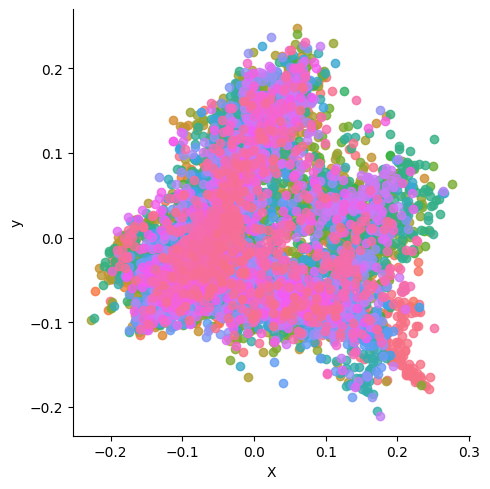

In [10]:
new_df = redux_fit(model=Isomap, components=2, randstate=42, data=df.iloc[:,:-2])

new_df['cluster'] = df['cluster']

sns.lmplot(x='X', y='y', data=new_df,  hue='cluster', fit_reg=False, legend=False)
scatter_kws = {'s': 10}  # Adjust the 's' value to control point size

plt.show()

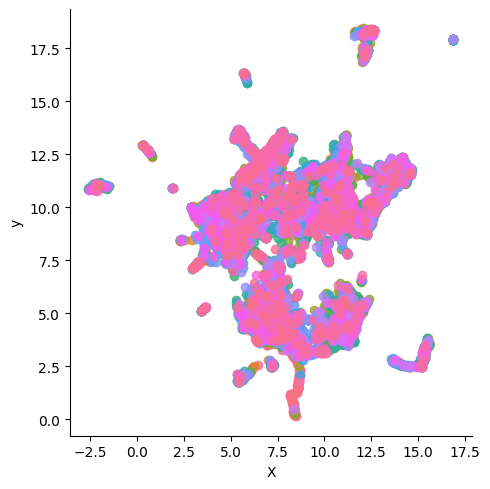

In [11]:
new_df = redux_fit(model=umap.UMAP, components=2, randstate=42, data=df.iloc[:,:-2])

new_df['cluster'] = df['cluster']

sns.lmplot(x='X', y='y', data=new_df,  hue='cluster', fit_reg=False, legend=False)
scatter_kws = {'s': 10}  # Adjust the 's' value to control point size

plt.show()

In [21]:
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, MDS

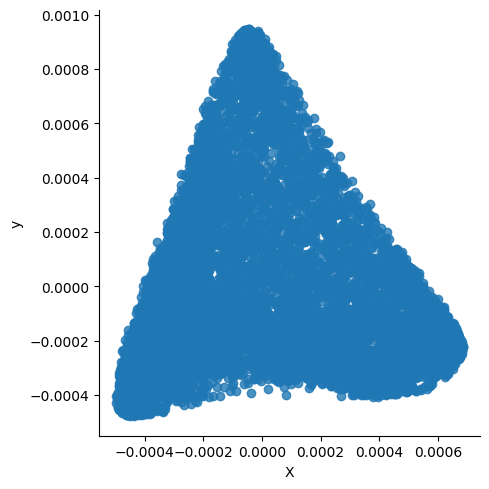

In [23]:
new_df = redux_fit(model=SpectralEmbedding, components=2, randstate=42, data=df.iloc[:,:-2])

sns.lmplot( x='X', y='y', data=new_df, fit_reg=False, legend=True)
scatter_kws = {'s': 10}  # Adjust the 's' value to control point size

plt.show()

In [13]:
os.listdir('all_paired/')

['230604_human_paired_seqs.csv',
 '230604_random_100.csv',
 'opig_data',
 '230618_human_paired_seqs.csv',
 'paired_human.fasta',
 '230624_test.csv',
 '230625_human_paired_seqs.csv',
 '230625_paired_rand1000.csv',
 '230701_dim_reduced_TSNE_rand1000.parquet',
 '230701_protein_embeddings.parquet',
 '230716_heavy_chain_protein_embeddings_1000.parquet',
 '230716_human_paired_seqs.csv',
 '230716_scfv_10000.csv',
 '230716_scfv_10000.fasta',
 'new_tmp',
 'clusterRes_all_seqs.fasta',
 'clusterRes_rep_seq.fasta',
 'clusterRes_cluster.tsv',
 '230722_cluster_tensor_scfv_10000.csv',
 '230805_ankh_tensor_10000.csv']

In [17]:
nd = pd.read_csv('all_paired/230716_human_paired_seqs.csv', index_col=0)

<ipython-input-17-f97f65dc8a19>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  nd = pd.read_csv('all_paired/230716_human_paired_seqs.csv', index_col=0)


'AAACCTGAGACTAAGT-1_contig_3_AAACCTGAGACTAAGT-1_contig_1_1287185'

In [48]:
nd = nd[nd['seq_id'].isin(df['seq'].to_list())]
df = df[df['seq'].isin(nd['seq_id'].to_list())]

nd.sort_values(by='seq_id', ascending=True, inplace=True)
df.sort_values(by='seq', ascending=True, inplace=True)

df.drop_duplicates(subset='seq', keep='first', inplace=True)

df['seq'].to_list() == nd['seq_id'].to_list()


True

In [21]:
nd.iloc[0]

Unnamed: 1                                                                   360
sequence_id_heavy                                    AACGTTGTCTCGCATC-1_contig_2
ANARCI_status_heavy                                       |Deletions: 10, 73||||
sequence_heavy                 AGCTCTGGGAGAAGAGCCCCAGCCCCAGAATTCCCAGGAGTTTCCA...
sequence_alignment_aa_heavy    QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...
v_call_heavy                                                         IGHV3-11*01
d_call_heavy                                                         IGHD3-22*01
j_call_heavy                                                            IGHJ5*02
sequence_id_light                                    AACGTTGTCTCGCATC-1_contig_1
ANARCI_status_light                                                        |||||
sequence_light                 GGGGAGGAACTGCTCAGTTAGGACCCAGACGGAACCATGGAAGCCC...
v_call_light                                                         IGKV3-15*01
j_call_light                

In [49]:
def combine_clusters(row):
    return ','.join(map(str, row))

nds = nd[['v_call_heavy','v_call_light']].copy()

def remove_subs(s: str) -> str:
  return s.split('*')[0]

nds = nds.applymap(lambda x: remove_subs(x))

# Apply the custom function along the rows axis to combine clusters into a new column
nds['New_Cluster'] = nds.apply(combine_clusters, axis=1)

# Get unique combinations of clusters and assign new IDs
nds['New_Cluster_ID'] = nds['New_Cluster'].factorize()[0]

nds.head()

,v_call_heavy,v_call_light,New_Cluster,New_Cluster_ID
1000557,IGHV4-39,IGKV3-15,"IGHV4-39,IGKV3-15",0
1000559,IGHV3-33,IGLV6-57,"IGHV3-33,IGLV6-57",1
601615,IGHV1-69,IGKV3-15,"IGHV1-69,IGKV3-15",2
987607,IGHV1-46,IGLV2-14,"IGHV1-46,IGLV2-14",3
16162,IGHV2-5,IGLV2-14,"IGHV2-5,IGLV2-14",4


In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

def cluster_purity(y_true, y_pred):
    confomat = confusion_matrix(y_true, y_pred)
    # We use the Linear Assignment Problem approach to solve label switching problem.
    row_ind, col_ind = linear_sum_assignment(-confomat)
    return confomat[row_ind, col_ind].sum() / np.sum(confomat)

n_clusters = [200,500,1000,1500,2000,2500,3000]
cluster_purities = []

df.sort_values(by='seq', ascending=True, inplace=True)

umap_embedding = umap.UMAP(n_components=10, random_state=42)
redux = umap_embedding.fit_transform(df.iloc[:, :-2])

for cluster in n_clusters:
  kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=10)
  kmeans.fit(redux)
  labels = kmeans.labels_
  purity = cluster_purity(y_true=nds['New_Cluster_ID'], y_pred=labels)
  cluster_purities.append(purity)

print(cluster_purities)

[0.17860371672526368, 0.22702159718734305, 0.25665494726268206, 0.26800602712204924, 0.2682069311903566, 0.26378704168759415, 0.2587644399799096]
